In [34]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.interpolate import LinearNDInterpolator

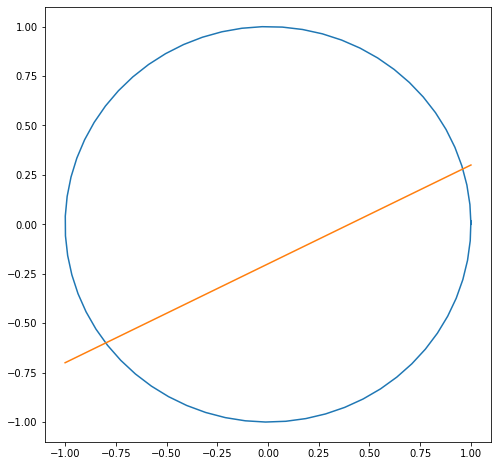

In [35]:
plt.figure(figsize=(8,8))
dx = 0.1
xx,zz = np.meshgrid(np.arange(0,1+dx,dx),np.arange(0,1+dx,dx))
pi = 3.14159
dtheta = 0.1
theta = np.arange(0,pi*2+dtheta,dtheta)
xcircle = np.cos(theta)
zcircle = np.sin(theta)
plt.plot(xcircle,zcircle)
x = np.arange(-1,1+dx,dx)
m = 0.5
c = -0.2
y = m*x + c
plt.plot(x,y)

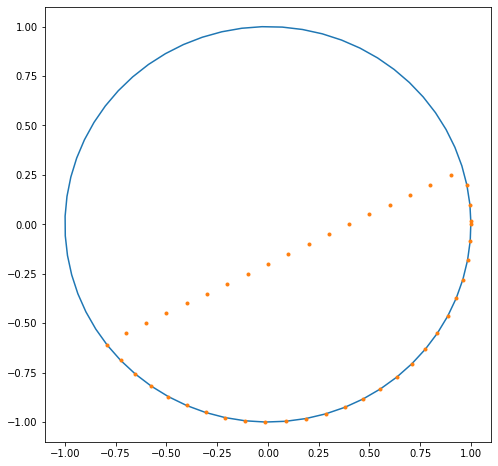

In [36]:
plt.figure(figsize=(8,8))
#finding all points below the line:
X = np.stack((xx.flatten(),zz.flatten()),axis=1)
Xline = np.stack((x,y),axis=1)
Xcircle = np.stack((xcircle,zcircle),axis=1)
f = zcircle - m*xcircle -c 
#plt.tricontourf(X[:,0],X[:,1],f)
#finding points that lie below the line:

Xcircle = Xcircle[f<0]

f = y**2 + x**2 - 1 
Xline = Xline[f<=0]

Xcircle = np.concatenate((Xcircle,Xline),axis=0)

plt.plot(xcircle,zcircle)
plt.plot(Xcircle[:,0],Xcircle[:,1],'.')



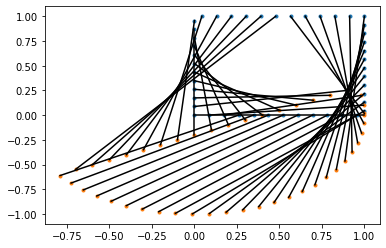

In [37]:
N = Xcircle.shape[0] #number of points for the edge of the unit square 

s_square = 4*np.arange(0.0,N,1.0)/N
Xexterior = np.zeros((N,2))
for i in range(0,N):
    if i<=N/4.0:

        Xexterior[i,0] = s_square[i]
        Xexterior[i,1] = 0 
    elif i<=N/2.0:
        Xexterior[i,0] = 1
        Xexterior[i,1] = s_square[i] - 1

    elif i<=3*N/4:
        Xexterior[i,0] = 3-s_square[i] 
        Xexterior[i,1] = 1

    else:
         Xexterior[i,0] = 0
         Xexterior[i,1] = 4-s_square[i] 
#edges of square 

#Xexterior = np.flipud(Xexterior)
plt.plot(Xexterior[:,0],Xexterior[:,1],'.')
plt.plot(Xcircle[:,0],Xcircle[:,1],'.')
for i in range(0,N):
    plt.plot([Xcircle[i,0],Xexterior[i,0]],[Xcircle[i,1],Xexterior[i,1]],'k')

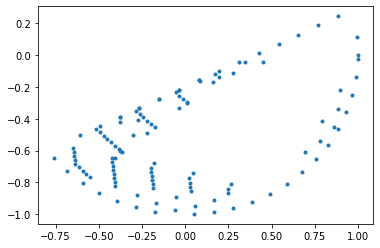

In [38]:
interpx = LinearNDInterpolator(Xexterior, Xcircle[:,0])
interpz = LinearNDInterpolator(Xexterior, Xcircle[:,1])
xtest = interpx(xx,zz)
ztest = interpz(xx,zz)
plt.plot(xtest.flatten(),ztest.flatten(),'.')